#Bosques Aleatorios

Jonnatan Arias Garcia
jonnatan.arias@utp.edu.co
jariasg@uniquindio.edu.co

Los Bosques aleatorios no implementa un algorítmo de ML nuevo, en realidad es una combinacion de árboles de desición en el cual el entrenamiento se realiza mediante bootstraping y la desición final se toma con la moda (para clasificación) o la media (para regresión) de las predicciones de cada árbol.

##Ventajas

*   Se usa muestreo con reemplazo (Bootstraping) de los datos de entrenamiento, ésto hace que sea difícil sobreajustar los árboles, por el contrario ésto hace que cada árbol disminuya su varianza y al usar el metodo de "votación" se cancelan los sesgos. **Los bosques aleatorios son excelentes en el bias-variance tradeoff**.
*   Son robustos respecto al ruido en los datos.
*   Puede tenerse la importancia relativa de las carácterísticas, lo cual nos permite hacer selección de las mísmas para hacer reducción dimensional.
*   Puede entrenarse en paralelo cada árbol.

## Algunas desventajas:


*   Al ser un método de ensamble puede ser muy costoso computacionalmente, tanto para entrenamiento como para predicción.
*   Su interpretabilidad no es tan simple como la de un sólo árbol.

#Ejemplo Breast-Cancer clasificador Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer

In [56]:
data = load_breast_cancer()
# Mostrar información básica sobre el conjunto de datos
print("Características del conjunto de datos:")
print(data.keys())

print("\nCantidad de características:")
print(data.feature_names.shape)

print("\nNombre de las características:")
print(data.feature_names)

print("\nNombre de las clases:")
print(data.target_names)

# Mostrar las primeras muestras del conjunto de datos
print("\nPrimeras muestras del conjunto de datos:")
print(data.data[:5])

# Mostrar las primeras etiquetas del conjunto de datos
print("\nEtiquetas de las primeras muestras:")
print(data.target[:5])

# Mostrar el número total de muestras y características
print("\nNúmero total de muestras y características:")
print(data.data.shape)

# Mostrar la distribución de las clases
import numpy as np
unique, counts = np.unique(data.target, return_counts=True)
print("\nDistribución de las clases:")
for label, count in zip(data.target_names, counts):
    print(f"{label}: {count} muestras")

Características del conjunto de datos:
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Cantidad de características:
(30,)

Nombre de las características:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Nombre de las clases:
['malignant' 'benign']

Primeras muestras del conjunto de datos:
[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+0

In [57]:
from sklearn.model_selection import train_test_split
X_can=data.data
y_can=data.target
X_can_train, X_can_test, y_can_train, y_can_test = train_test_split(X_can, y_can, test_size=0.3)

In [58]:
from sklearn.ensemble import RandomForestClassifier

cancerForest = RandomForestClassifier(n_estimators=500)

# Parámetros principales que puedes ajustar:
# - n_estimators: número de árboles en el bosque (por defecto = 100)
# - criterion: criterio utilizado para medir la calidad de la división (por defecto = 'gini' para clasificación)
# - max_depth: profundidad máxima de los árboles (por defecto = None)
# - min_samples_split: número mínimo de muestras requeridas para dividir un nodo interno (por defecto = 2)
# - min_samples_leaf: número mínimo de muestras requeridas para ser un nodo hoja (por defecto = 1)
# - max_features: número de características a considerar en cada división (por defecto = 'auto', que es sqrt(n_features))

cancerForest = cancerForest.fit(X_can_train,y_can_train)
cancerForest.feature_importances_

array([0.02999191, 0.01556269, 0.03390761, 0.04023354, 0.00528308,
       0.01137843, 0.06806929, 0.08840508, 0.00372262, 0.00433121,
       0.01365122, 0.0049937 , 0.01374254, 0.03327644, 0.0046747 ,
       0.00369201, 0.00762424, 0.00574965, 0.00449322, 0.00476395,
       0.13696436, 0.0150858 , 0.14624516, 0.10840246, 0.01123052,
       0.0142422 , 0.03055331, 0.12478188, 0.00714873, 0.00779844])

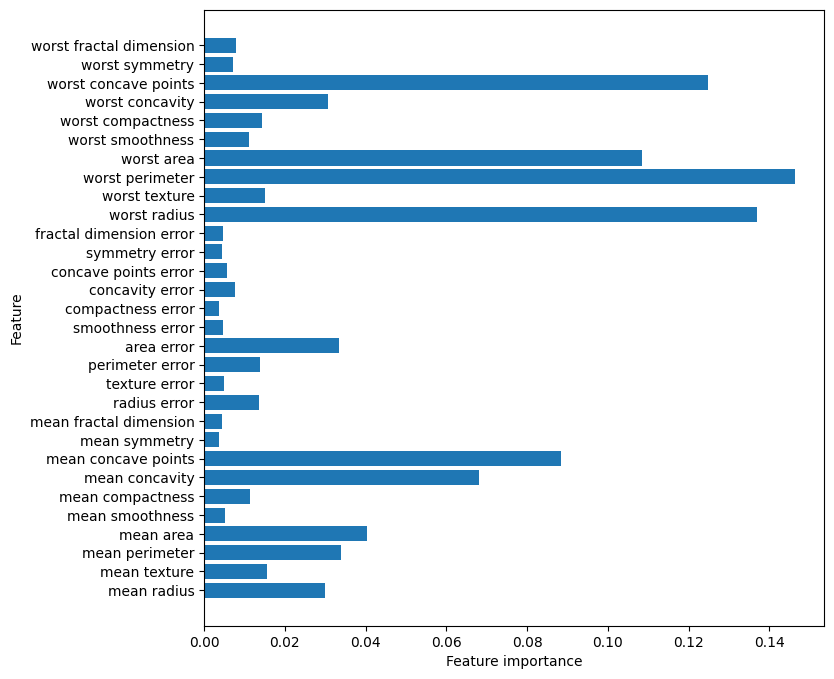

In [59]:
import matplotlib.pyplot as plt

def plot_feature_importances_cancer(model):
  n_features = data.data.shape[1]
  plt.figure(figsize=(8,8))
  plt.barh(range(n_features), model.feature_importances_, align='center')
  plt.yticks(np.arange(n_features), data.feature_names)
  plt.xlabel("Feature importance")
  plt.ylabel("Feature")

plot_feature_importances_cancer(cancerForest)

In [60]:
from sklearn import metrics

y_can_pred = cancerForest.predict(X_can_test)
print("Accuracy:",metrics.accuracy_score(y_can_test, y_can_pred))

Accuracy: 0.9590643274853801


probemos otra medida de desemepeño, la matrix de confusion

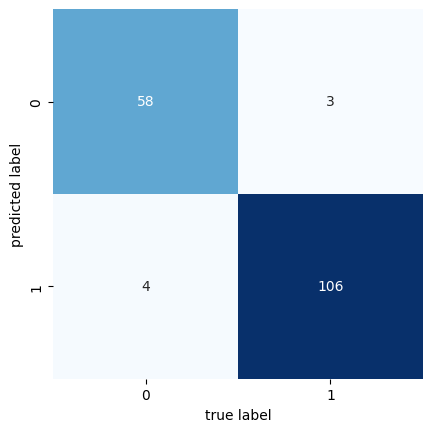

In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(y_can_test, y_can_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
            cbar=False, cmap='Blues')
plt.xlabel('true label')
plt.ylabel('predicted label');

La matrix nos enfrenta valores reales y valores predichos
La diagonal alta nos indica un buen ajuste

#Ejemplo dummy regresor, random Forest

Sabemos que tambien sirve para como regresor.
Vamos a probarlo con una funcion dummy ciclica

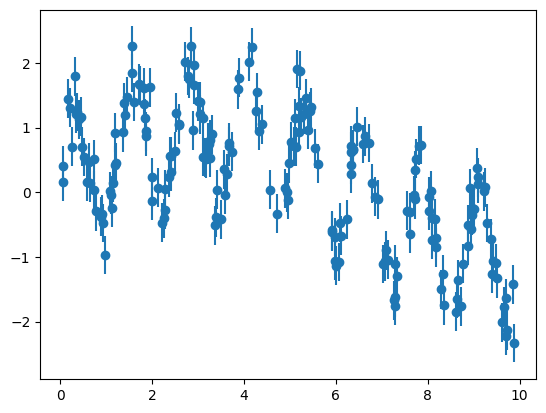

In [62]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o');

Usando el regresor podemos encontrar la mejor curva de ajuste

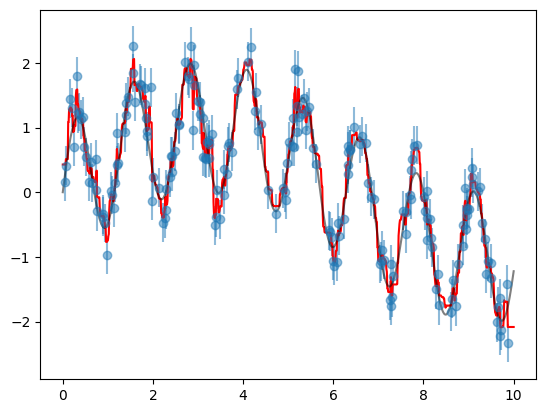

In [63]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(200)
# Parámetros principales que puedes ajustar:
# - n_estimators: número de árboles en el bosque (por defecto = 100)
# - criterion: criterio utilizado para medir la calidad de la división (por defecto = 'mse' para regresión)
# - max_depth: profundidad máxima de los árboles (por defecto = None)
# - min_samples_split: número mínimo de muestras requeridas para dividir un nodo interno (por defecto = 2)
# - min_samples_leaf: número mínimo de muestras requeridas para ser un nodo hoja (por defecto = 1)
# - max_features: número de características a considerar en cada división (por defecto = 'auto', que es sqrt(n_features))

forest = forest.fit(x[:, None], y)

#generamos datos test (ytrue) y predichos(yfit)
xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)

plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);

Aquí se muestra el verdadero modelo es la curva gris suave, mientras que el modelo de bosque aleatorio se muestra en la curva roja.

¡El modelo no paramétrico de bosque aleatorio es lo suficientemente flexible como para ajustarse a los datos multiperíodo, sin necesidad de especificar un modelo multiperíodo!

In [64]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(yfit, ytrue)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.0440686339176831
